In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("TRAIN shape:", train.shape)
print("TEST shape:", test.shape)
print("\nTrain columns:\n", train.columns.tolist())

print("\n----train.info()----")
train.info()

TRAIN shape: (1460, 81)
TEST shape: (1459, 80)

Train columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '

Target (SalesPrice) summary:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


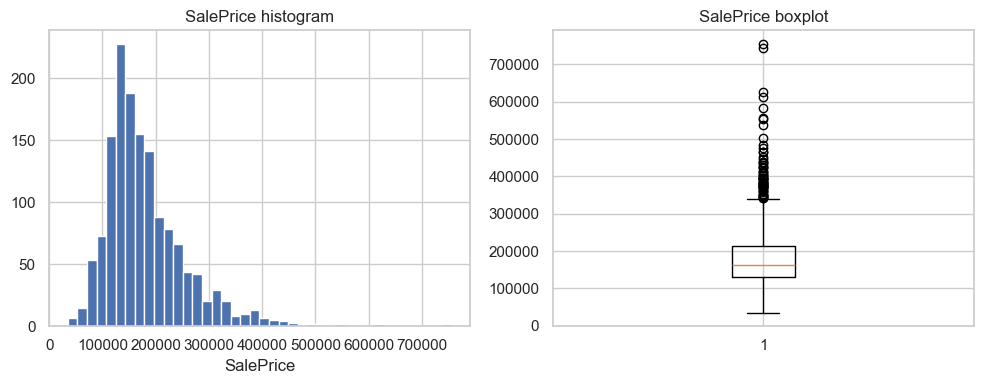

In [4]:
print("Target (SalesPrice) summary:")
print(train['SalePrice'].describe())

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(train['SalePrice'], bins=40)
plt.title("SalePrice histogram")
plt.xlabel("SalePrice")

plt.subplot(1, 2, 2)
plt.boxplot(train['SalePrice'])
plt.title("SalePrice boxplot")

plt.tight_layout()
plt.show()

In [5]:
missing=train.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)

missing_pct=(missing/ len(train))*100

missing_df=pd.DataFrame({
    "missing_count": missing,
    "missing_percentage": missing_pct
})
missing_df

,missing_count,missing_percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [6]:
cols_to_drop=['PoolQC', 'MiscFeature', 'Alley']

train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

train.shape, test.shape

((1460, 78), (1459, 77))

In [7]:
no_feature_cols={
    'Fence', 'MasVnrType', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'BsmtQual', 'BsmtCond'
}

for col in no_feature_cols:
    train[col]=train[col].fillna('None')
    test[col]=test[col].fillna('None')

In [8]:
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
test['MasVnArea']=test['MasVnrArea'].fillna(0)

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0]) #Electrical   1 missing (0.06%)   → only in TRAIN

In [9]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [10]:
train_missing = train.isnull().sum()
train_missing = train_missing[train_missing > 0].sort_values(ascending=False)

test_missing = test.isnull().sum()
test_missing = test_missing[test_missing > 0].sort_values(ascending=False)

print("Missing values in TRAIN:\n", train_missing)
print("\nMissing values in TEST:\n", test_missing)

Missing values in TRAIN:
 Series([], dtype: int64)

Missing values in TEST:
 MasVnrArea      15
MSZoning         4
Utilities        2
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Exterior2nd      1
Exterior1st      1
BsmtUnfSF        1
BsmtFinSF2       1
BsmtFinSF1       1
TotalBsmtSF      1
KitchenQual      1
GarageCars       1
GarageArea       1
SaleType         1
dtype: int64


In [11]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])

test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)

test['Functional'] = test['Functional'].fillna('Typ')

test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

basement_cols = ['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF']
for col in basement_cols:
    test[col] = test[col].fillna(0)

test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

test['GarageCars'] = test['GarageCars'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)

test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

"Test missing values cleaned ✔"

'Test missing values cleaned ✔'

In [12]:
test.isnull().sum().sum()

np.int64(0)

In [13]:
categorical_cols=train.select_dtypes(include=['object']).columns
numerical_cols=train.select_dtypes(exclude=['object']).columns

print("Categorical columns:", len(categorical_cols))
print("Numerical columns:", len(numerical_cols))
categorical_cols

Categorical columns: 40
Numerical columns: 38


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder

ordinal_cols = ['ExterQual', 'ExterCond', 'KitchenQual', 'HeatingQC', 
                'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']

quality_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}

for col in ordinal_cols:
    train[col] = train[col].map(quality_map)
    test[col]  = test[col].map(quality_map)

In [15]:
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
test  = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

train.shape, test.shape

((1460, 252), (1459, 236))

In [16]:
train, test = train.align(test, join='left', axis=1)
test = test.fillna(0)

train.shape, test.shape

((1460, 252), (1459, 252))

In [17]:
X=train.drop('SalePrice', axis=1)
y=train['SalePrice']

X.shape, y.shape

((1460, 251), (1460,))

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid=train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_valid.shape

((1168, 251), (292, 251))

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred)))
print("Linear Regression R²:", r2_score(y_valid, y_pred))

Linear Regression RMSE: 52540.25766743854
Linear Regression R²: 0.6401093511284754


In [22]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge=ridge.predict(X_valid)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_ridge)))
print("Ridge R2:", r2_score(y_valid, y_pred_ridge))

Ridge RMSE: 30339.584088399763
Ridge R2: 0.8799933226054223


In [24]:
from sklearn.model_selection import GridSearchCV

params={'alpha':[0.1, 1.0, 5.0, 10.0,20.0, 50.0, 100.0]}

ridge_cv=GridSearchCV(Ridge(), params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X, y)

best_alpha=ridge_cv.best_params_['alpha']
best_alpha

20.0

In [26]:
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

y_pred_ridge_best = ridge_best.predict(X_valid)

print("Best Ridge RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_ridge_best)))
print("Best Ridge R²:", r2_score(y_valid, y_pred_ridge_best))

Best Ridge RMSE: 30763.375519859874
Best Ridge R²: 0.8766173370189723


In [32]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.001, max_iter=50000))
])

lasso_pipe.fit(X_train, y_train)
y_pred_lasso = lasso_pipe.predict(X_valid)

print("Lasso RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_lasso)))
print("Lasso R²:", r2_score(y_valid, y_pred_lasso))

Lasso RMSE: 52552.566617946955
Lasso R²: 0.6399407034936844


C:\Users\ASUS\OneDrive\Desktop\Ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.874e+09, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

elastic_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=50000))
])

elastic_pipe.fit(X_train, y_train)
y_pred_elastic = elastic_pipe.predict(X_valid)

print("ElasticNet RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_elastic)))
print("ElasticNet R²:", r2_score(y_valid, y_pred_elastic))

ElasticNet RMSE: 50761.713229844194
ElasticNet R²: 0.6640623279340437


In [40]:
final_ridge = Ridge(alpha=best_alpha)   
final_ridge.fit(X, y)

,alpha,20.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [42]:
test = test.drop(columns=['SalePrice'])

In [43]:
test = test.drop(columns=['SalePrice'], errors='ignore')

In [44]:
test_preds = final_ridge.predict(test)
test_preds[:5]

array([ 99122.19756329, 136827.28543939, 171297.47859918, 185000.85400698,
       194870.41209383])

In [45]:
submission = pd.DataFrame({
    "Id": np.arange(1461, 1461 + len(test_preds)),
    "SalePrice": test_preds
})

submission.to_csv("submission.csv", index=False)

submission.head()

,Id,SalePrice
0,1461,99122.197563
1,1462,136827.285439
2,1463,171297.478599
3,1464,185000.854007
4,1465,194870.412094
